# Analysis of HA reboot

using iperf to pass traffic across a L2 HA pair of 3070 the following traffic disruptions were measured. 
data derived from :
iperf -c 172.16.107.11 -f k  -P 5 -i 1 -t 2000 -y c -o iperf.out -x C | tee iperf1.out



In [1]:
# Juypter cjavscript trick to hide code until its needed. 
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
     

In [2]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
# csv file ferived from iperf output
filename='ha_switchover_18_45'
with open(filename +'.iperf', 'r') as original: data = original.read()
with open(filename +'.csv', 'w') as modified: modified.write("DateTime,,,,,Ident,Secs,TX,RX\n" + data)
iperf_df = pd.read_csv(filename +'.csv', sep=',')
iperf_df['DateTime'] = pd.to_datetime(iperf_df['DateTime'], format='%Y%m%d%H%M%S')
#clean up the iperf seconds range into two items so we can use it later as an x axis reference.
iperf1_df = pd.DataFrame(iperf_df.Secs.str.split('-',1).tolist(), columns = ['Secs1','Secs2'])
iperf_df = iperf_df.join(iperf1_df)
# Ident == -1 is the accumulated flow stats
main_throughput_df = iperf_df.loc[iperf_df.Ident == -1]
# all flows that show zero rx throughput
zero_throughput_df = iperf_df.loc[iperf_df.RX == 0]
#df for the throughtput graph
p_main_th_df = main_throughput_df[['Secs1','RX']]
#df that captures the region of zero throughput
z_main_th_df = zero_throughput_df[['DateTime', 'Ident','Secs1','RX']]
##iperf_df.head(5)


<IPython.core.display.Javascript object>


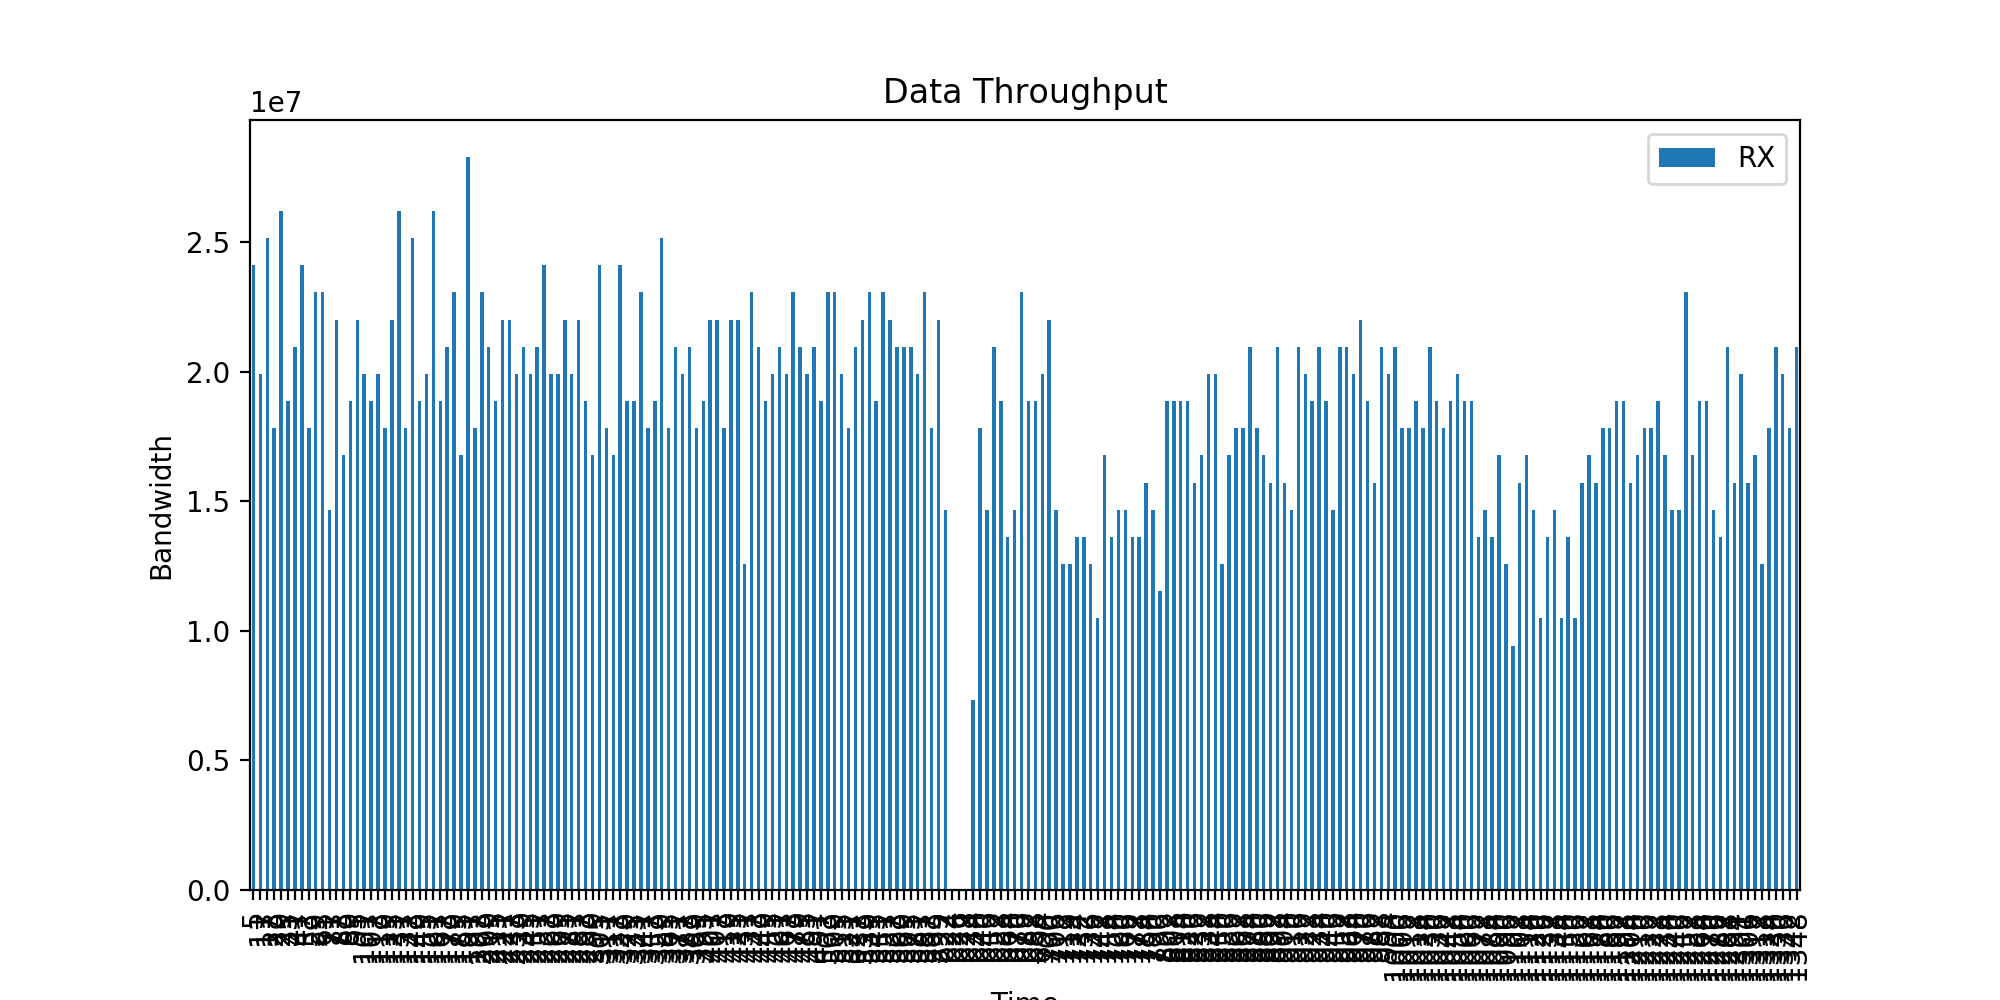

In [3]:
ax=p_main_th_df.plot( title='Data Throughput', y='RX', kind='bar')
ax.set(xlabel='Time', ylabel='Bandwidth')
plt.show()


In [4]:
min_zero = z_main_th_df[:1].index[0] - 20
max_zero = z_main_th_df[-1:].index[0] + 20 
##z_main_th_df.head(5)

<IPython.core.display.Javascript object>


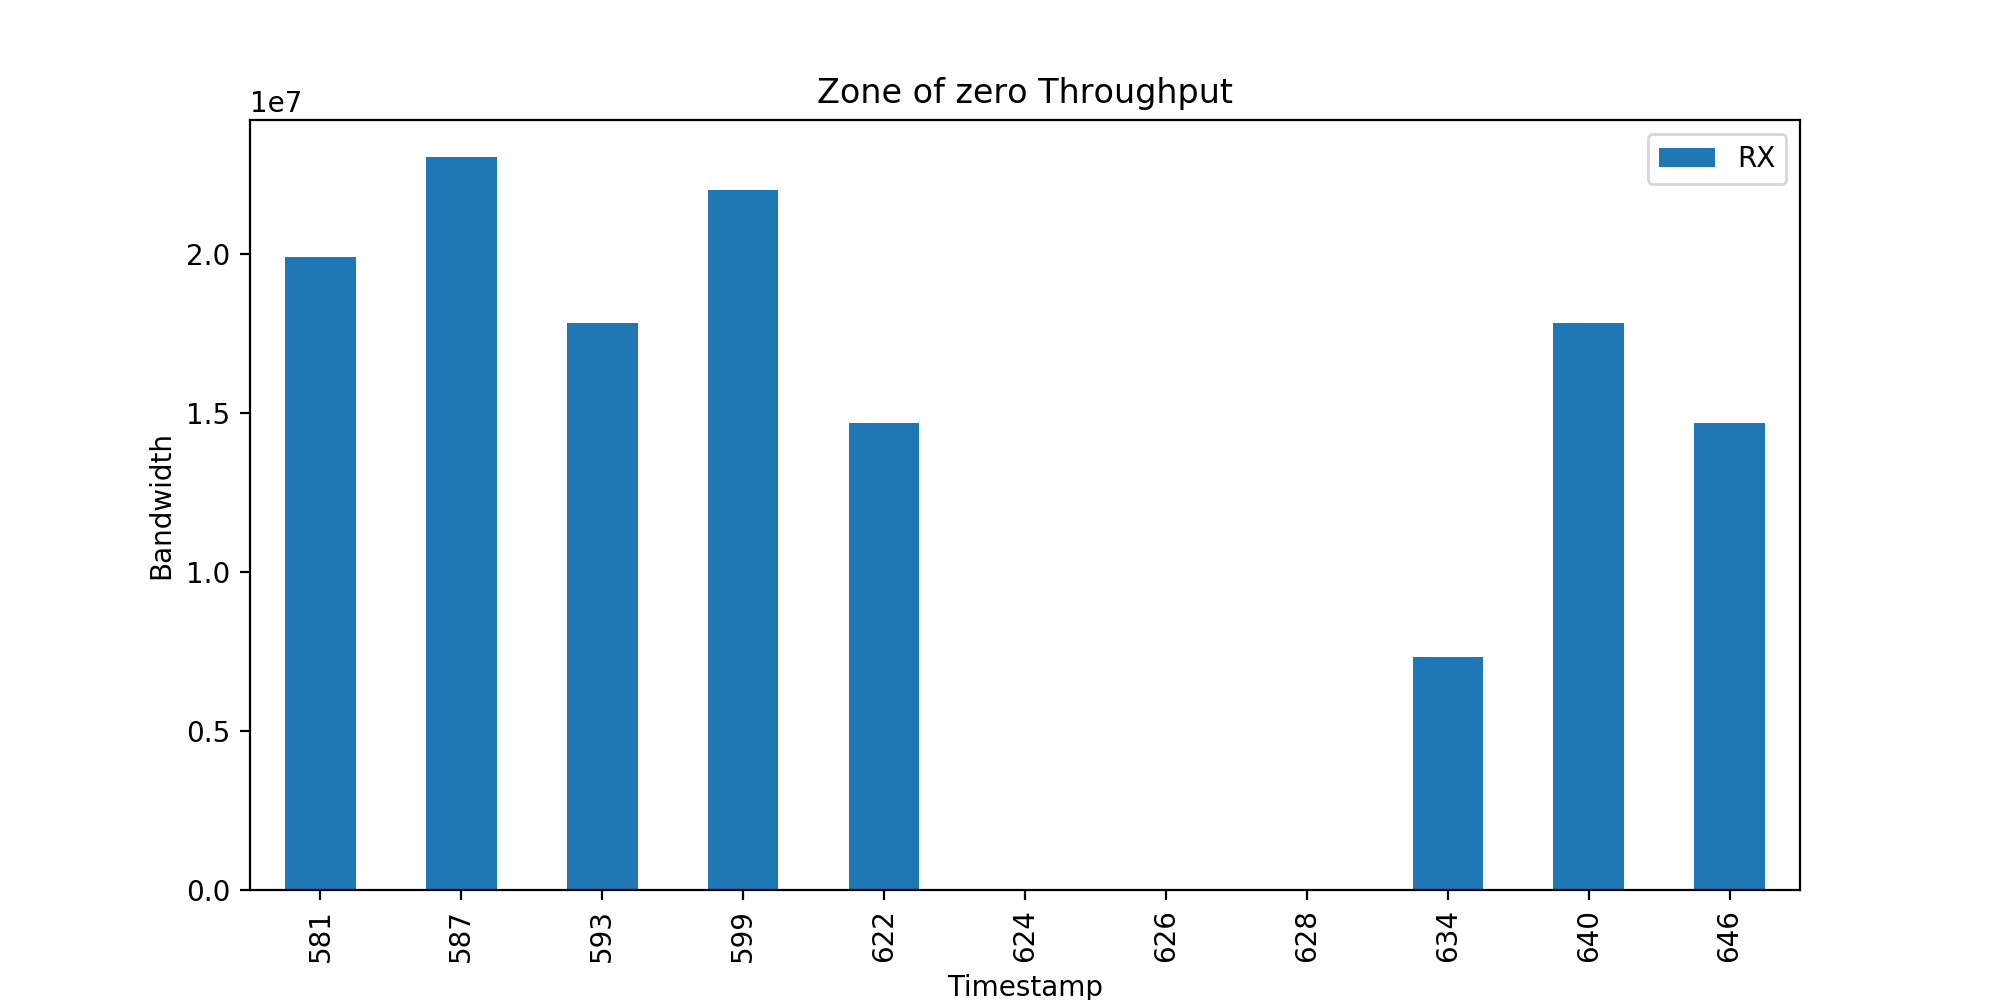

In [5]:
ax=p_main_th_df.loc[min_zero:max_zero].plot( title='Zone of zero Throughput',y='RX', kind='bar')
ax.set(xlabel='Timestamp', ylabel='Bandwidth')
plt.show()